<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Junho_2020/blob/master/ANN_segmentacao_tensor_OUR_v12_junho_04_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd



In [2]:
!pip install mahotas

In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
labels = []
images = []
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


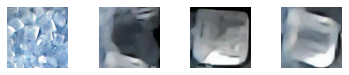

In [8]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [0]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [0]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

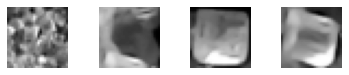

In [11]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [12]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [0]:
#sparse_softmax_cross_entropy_with_logits()

In [0]:

W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [15]:
print(len(yw_train))
print(len(yw_test))

617
265


In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [0]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.4804 - accuracy: 0.3793
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.0241 - accuracy: 0.6078
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8901 - accuracy: 0.6564
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8021 - accuracy: 0.6872
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7513 - accuracy: 0.6807
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.7147
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.7261
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.7439
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7326
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7164


In [20]:
'''
predictions = model.predict(train_images) #x_test[:3])
print('predictions shape:', predictions.shape)
'''

"\npredictions = model.predict(train_images) #x_test[:3])\nprint('predictions shape:', predictions.shape)\n"

In [0]:
#print(predictions)

In [0]:
#print(train_images.shape)

In [23]:
'''
result = model.evaluate(train_images) # esta estranho
print(result)
result = model.predict(train_images) # esta estranho
print(result)
'''

'\nresult = model.evaluate(train_images) # esta estranho\nprint(result)\nresult = model.predict(train_images) # esta estranho\nprint(result)\n'

In [0]:
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
img=ww[0]

In [27]:
print(img.shape)

(1200, 1200)


In [28]:
x=images28
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)

tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 4 4 4 4 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 1 4 4 2 4 1 1 1 1 4 1 1 1 4 1 1 1 3 3 2 3 2 3 3 3 3 3 1 1
 1 1 1 1 1 1 1 1 1 4 4 4 1 4 1 4 4 2 4 1 1 4 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1
 1 1 1 1 4 1 1 2 2 4 4 1 1 4 1 2 2 4 4 4 1 1 4 3 3 3 3 3 3 2 3 3 3 1 1 1 1
 1 1 1 1 1 1 2 4 2 4 4 4 2 4 1 2 4 1 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 1 4 4 4 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
 4 4 2 1 2 2 1 4 4 4 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 4 4 4 2 4 2 3
 4 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 1 4 1 1 3 3
 3 4 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 2 1 2 1 2 4 4 1 1 1 2 1 1 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 2 1 2 4 1 4 4 1 4 4 4 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 4 4 4 1 4 4 3 3 3 2 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 4 2 1 1 1 4 4 2 3 3 2 4 4 1 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 4 4 4 1 2 3 3 1 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 4 1 4 4 1 1 4
 1 1 4 4 1 1 4

In [29]:
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

     y_Actual  y_Predicted
0           1            1
1           1            1
2           1            1
3           1            1
4           1            1
..        ...          ...
877         4            1
878         4            1
879         4            4
880         4            1
881         4            1

[882 rows x 2 columns]


In [30]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1   2    3   4
Actual                     
1          351   0    1   8
2           70  36    5  69
3            2   7  165   6
4           82   8    1  71


In [31]:
import sklearn
y_true = df['y_Actual']
y_pred = df['y_Predicted']

print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.97      0.81       360
           2       0.71      0.20      0.31       180
           3       0.96      0.92      0.94       180
           4       0.46      0.44      0.45       162

    accuracy                           0.71       882
   macro avg       0.71      0.63      0.63       882
weighted avg       0.71      0.71      0.67       882



In [0]:
# Segmentation: start here......

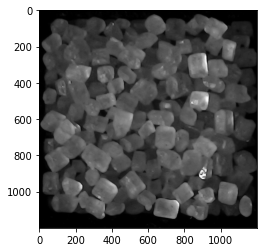

In [33]:
plt.imshow(img, cmap = "gray")

In [0]:
a=0
b=1200
c=100
d=200
Num=50
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


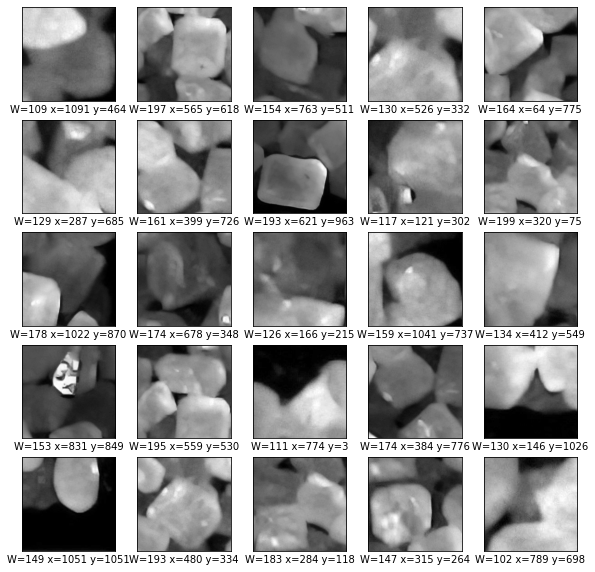

In [35]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


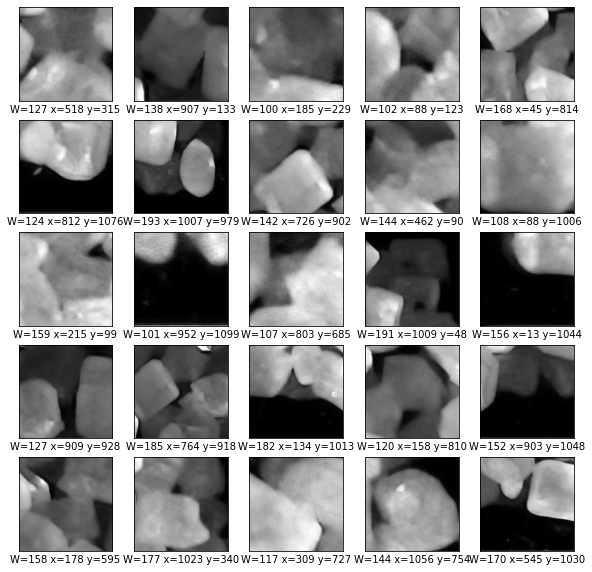

In [36]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i+25], cmap = "gray")
    plt.xlabel(label[i+25])
plt.show()

In [37]:
print(label)

['W=109 x=1091 y=464', 'W=197 x=565 y=618', 'W=154 x=763 y=511', 'W=130 x=526 y=332', 'W=164 x=64 y=775', 'W=129 x=287 y=685', 'W=161 x=399 y=726', 'W=193 x=621 y=963', 'W=117 x=121 y=302', 'W=199 x=320 y=75', 'W=178 x=1022 y=870', 'W=174 x=678 y=348', 'W=126 x=166 y=215', 'W=159 x=1041 y=737', 'W=134 x=412 y=549', 'W=153 x=831 y=849', 'W=195 x=559 y=530', 'W=111 x=774 y=3', 'W=174 x=384 y=776', 'W=130 x=146 y=1026', 'W=149 x=1051 y=1051', 'W=193 x=480 y=334', 'W=183 x=284 y=118', 'W=147 x=315 y=264', 'W=102 x=789 y=698', 'W=127 x=518 y=315', 'W=138 x=907 y=133', 'W=100 x=185 y=229', 'W=102 x=88 y=123', 'W=168 x=45 y=814', 'W=124 x=812 y=1076', 'W=193 x=1007 y=979', 'W=142 x=726 y=902', 'W=144 x=462 y=90', 'W=108 x=88 y=1006', 'W=159 x=215 y=99', 'W=101 x=952 y=1099', 'W=107 x=803 y=685', 'W=191 x=1009 y=48', 'W=156 x=13 y=1044', 'W=127 x=909 y=928', 'W=185 x=764 y=918', 'W=182 x=134 y=1013', 'W=120 x=158 y=810', 'W=152 x=903 y=1048', 'W=158 x=178 y=595', 'W=177 x=1023 y=340', 'W=117 x

In [0]:
#img = ww[0].reshape((28,28))
#ww[0].shape
#ww[0].size

In [39]:
print(np.array(ww[0]))

[[71 72 70 ... 11  9  6]
 [70 70 70 ... 11  6  5]
 [71 72 72 ...  7  5  4]
 ...
 [57 55 54 ...  0  0  0]
 [57 56 55 ...  0  0  0]
 [59 58 57 ...  0  0  0]]


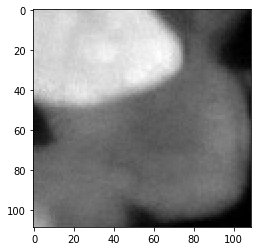

In [40]:
plt.imshow(ww[0], cmap = "gray")

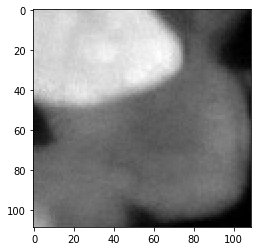

In [41]:

data=np.array(ww[0])
img = Image.fromarray(data.astype('uint8'), mode='L')
plt.imshow(img, cmap = "gray")


In [0]:
Size=28
xw=[]
img=np.float32(img)
img=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)


In [0]:
#num_classes=4
#confusion = tf.confusion_matrix(labels=y, predictions=prediction, num_classes=num_classes)
#print(confusion)

In [44]:
print(images28.shape)

(882, 28, 28)


In [45]:
print(images28.shape)

(882, 28, 28)


In [46]:
#xw=ww/255
#print(ww[0]/255)
list1 = ww[0]
print(list1)

[[71 72 70 ... 11  9  6]
 [70 70 70 ... 11  6  5]
 [71 72 72 ...  7  5  4]
 ...
 [57 55 54 ...  0  0  0]
 [57 56 55 ...  0  0  0]
 [59 58 57 ...  0  0  0]]


In [47]:
list1 = img
print(list1[0])

[70.98662   69.87358   70.67141   73.30839   72.57992   69.871895
 65.58101   65.77881   69.07911   72.34063   75.70667   76.37345
 77.09586   75.884514  70.81112   52.151924  30.162529  23.42993
 21.73159   21.746231  24.109417  28.966415  28.229355  26.49516
 23.98182   21.660128  14.969868   7.4194937]


In [48]:
print(images28[0].shape)

(28, 28)


In [0]:
wn=[]
for i in ww:
  xn=i/255
  wn.append(xn)

In [50]:
print(wn[4].shape)

(164, 164)


In [51]:

# x=np.array(ww)/255
data_np=np.array(ww)/255
#x=tf.convert_to_tensor(data_np, np.float32)
x=tf.convert_to_tensor(data_np)
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)


ValueError: ignored

In [0]:
img.size

In [0]:
#print(xw)